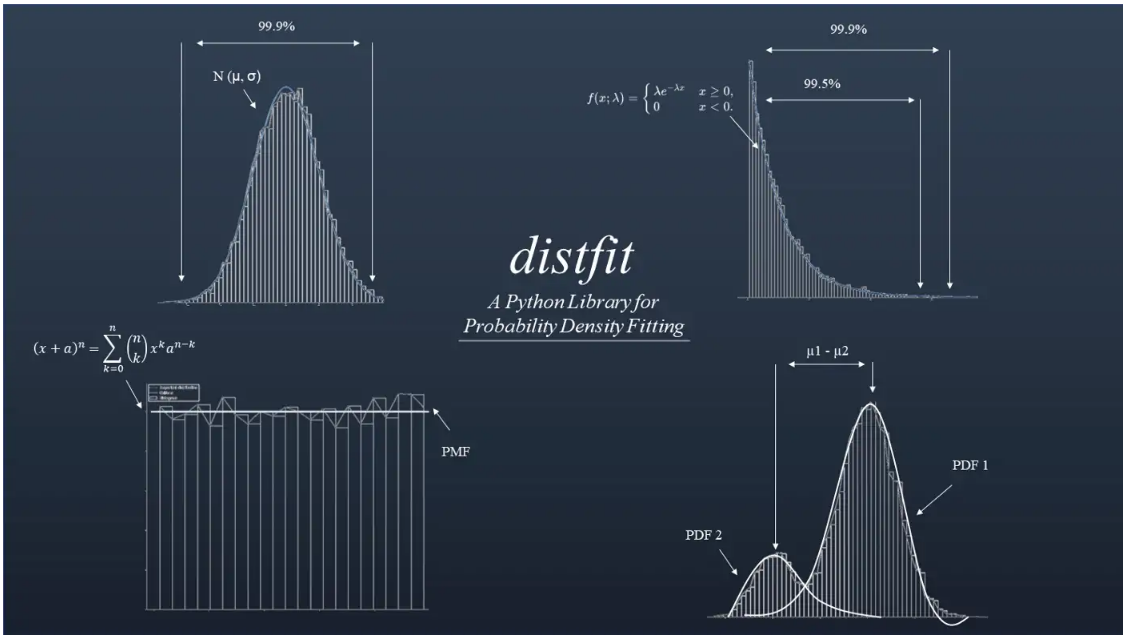

### How to determine the best fit using a quantitative approach and how to confirm it using visual inspections.

The easiest manner to determine the underlying distribution is by visually inspecting the random variable(s) using a histogram. With the candidate distribution, various plots can be created such as the Probability Distribution Function plot (PDF/CDF), and the QQ plot. However, to determine the exact distribution parameters (e.g., loc, scale), it is essential to use quantitative methods. 

The probability density function is a fundamental concept in statistics. Briefly, for a given random variable X, we aim to specify the function f that gives a natural description of the distribution of X.
Before making modeling decisions, you need to know the underlying data distribution.

When it comes to data, it is important to explore the fundamental characteristics of the data too, such as skewness, kurtosis, outliers, distribution shape, univariate, bimodal, etc. Based on these characteristics it is easier to decide which models are best to use because most models have prerequisites for the data. As an example, a well-known and popular technique is Principal Component Analysis (PCA). This method computes the covariance matrix and requires the data to be multivariate normal for the PCA to be valid. In addition, a PCA is also known to be sensitive to outliers. Thus, before doing a PCA step, you need to know whether your data needs a (log)normalization or whether outliers need to be removed. 

Note:
 Empirical distributions are frequency distributions of observed scores. Theoretical distributions are distributions based on logic or mathematical formulas.

The histogram is a well-known plot in data analysis which is a graphical representation of the distribution of the dataset. The histogram summarizes the number of observations that fall within the bins. With libraries such as matplotlib hist() it is straightforward to make a visual inspection of the data. Changing the range of the number of bins will help to identify whether the density looks like a common probability distribution by the shape of the histogram. An inspection will also give hints whether the data is symmetric or skewed and whether it has multiple peaks or outliers. 
• The bell shape of the Normal distribution.
• The descending or ascending shape of an Exponential or Pareto distribution.
• The flat shape of the Uniform distribution.
• The complex shape that does not fit any of the theoretical distributions (e.g, multiple peaks).

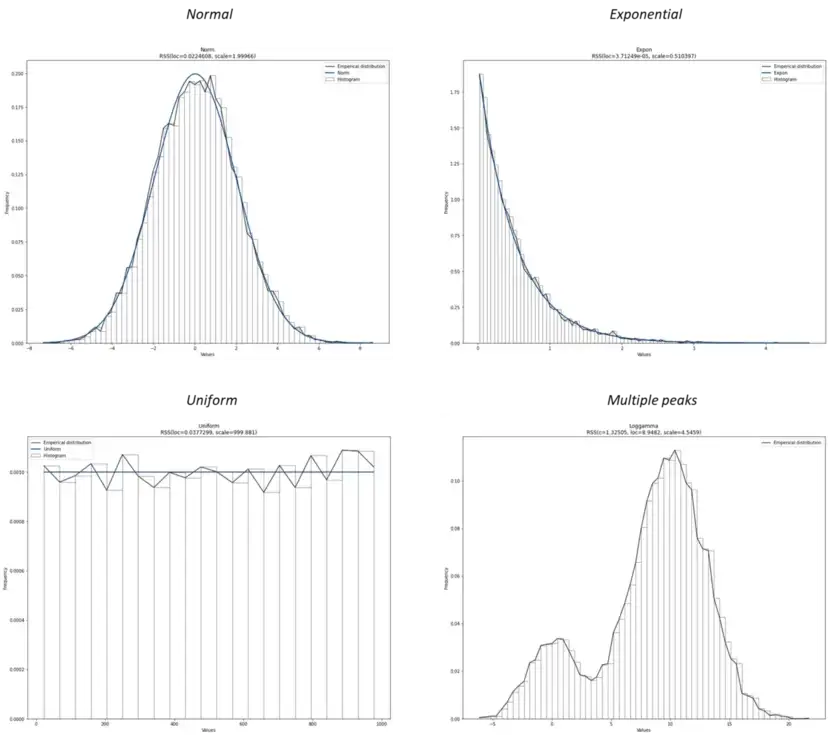

With parametric fitting, we make assumptions about the parameters of the population distribution from the input data. Or in other words, the shape of the histogram should match any of the known theoretical distributions. The advantage of the parametric fitting is that it is computationally efficient and the results are easy to interpret. The disadvantage is that it can be sensitive to outliers when having a low number of samples. 
<br> 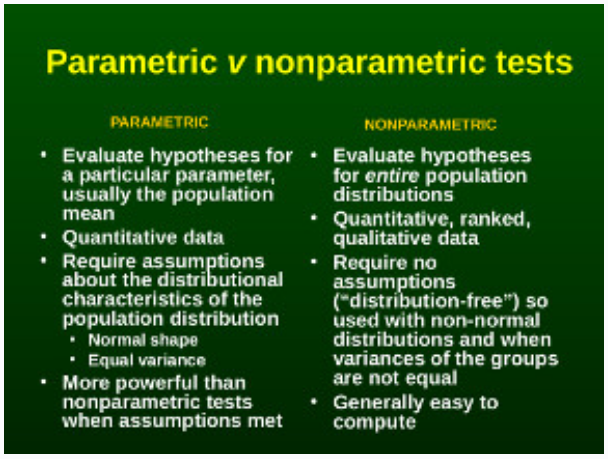

In case you find distributions with multiple peaks (bimodal or multimodal), the peaks should not disappear with different numbers of bins. Bimodal distributions usually hint toward mixed populations. In addition, if you observe large spikes in density for a given value or a small range of values, it may point toward possible outliers. Outliers often present themselves on the tail of a distribution and are far away from the rest of the density.

A histogram is a great manner to inspect a relatively small number of samples (random variables, or data points). However, when the number of samples increase or more than two histograms are plotted, the visuals can become troublesome, and a visual comparison with a theoretical distribution difficult to judge. Instead, a Cumulative Distribution Function (CDF) plot or Quantile-Quantile plot (QQ plot) can be more insightful. But these plots require a candidate theoretical distribution(s) that best matches (or fits) with the empirical data distribution.

### Four steps to determine the theoretical distribution.

1. Compute density and weights from a histogram. The first step is to flatten the data into an array and create the histogram by grouping observations into bins and counting the number of events in each bin. The choice of the number of bins is important as it controls the coarseness of the distribution. Experimenting with different bin sizes can provide multiple perspectives on the same data. In distfit, the bin width can be manually defined or mathematically determined on the observations themselves. The latter option is the default.

2. Estimate the distribution parameters from the data. In a parametric approach, the next step is to estimate the shape, location, and scale parameters based on the (selected) theoretical distribution(s). This typically involves methods such as maximum likelihood estimation (MLE) to determine the values of the parameters that best fit the data. For example, if the normal distribution is chosen, the MLE method will estimate the mean and standard deviation of the data.

3. Check the goodness-of-fit. Once the parameters have been estimated, the fit of the theoretical distribution is evaluated. This can be done using a goodness-of-fit test. Popular statistical tests are Residual Sum of Squares (RSS, also named SSE), Wasserstein, Kolmogorov-Smirnov, and the Energy test (also available in distfit).

4. Selection of best theoretical distribution. At this point, theoretical distributions are tested and scored using the goodness-of-fit test statistic. The scores can now be sorted and the theoretical distribution with the best score can be selected.
As a final step, the model can be validated using methods such as cross-validation, bootstrapping, or a holdout dataset. It is essential to check if the model is generalizing well and also to check if the assumptions such as independence and normality are met. Once the theoretical distribution has been fitted and validated, it can be used in many applications (keep on reading in the section below).

Distribution fitting has great benefits when working in the field of data science. It is not only to better understand, explore, and prepare the data but also to bring fast and lightweight solutions.

### The distfit library finds the best fit for your data.

• With the distfit library it is easy to find the best theoretical distribution with only a few lines of code.
• Finds the best fit for parametric, non-parametric, and discrete distributions.
• Prediction of outliers/novelties for (new) unseen samples.
• Generates synthetic data based on the fitted distribution.
• Plots: Histograms, Probability Density Function plots, Cumulative Density Function plots (CDF), Histograms, Quantile-Quantile plots (QQ-plot), Probability plots, and Summary plots.
• Saving and loading models.

In [4]:
#installing
pip install distfit

     ---------------------------------------- 7.2/7.2 MB 7.9 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
Note: you may need to restart the kernel to use updated packages.


### How to identify the best fit using parametric fitting?

With parametric fitting, we make assumptions about the parameters of the population distribution from the input data. Or in other words, the shape of the histogram should match any of the known theoretical distributions. The advantage of the parametric fitting is that it is computationally efficient and the results are easy to interpret. The disadvantage is that it can be sensitive to outliers when having a low number of samples. 

The distfit library can determine the best fit across 89 theoretical distributions which are utilized from the scipy library. To score the fit, there are four goodness-of-fit statistical tests; Residual Sum of Squares (RSS or SSE), Wasserstein, Kolmogorov-Smirnov (KS), and Energy. For each fitted theoretical distribution, the loc, scale, and arg parameters are returned, such as mean and standard deviation for normal distribution.

Finding the best matching theoretical distribution for your data set requires a goodness-of-fit statistical test.

In the following example, we will generate data from the normal distribution with mean=2 and standard deviation=4. We will use distfit to estimate these two parameters from the data itself. If you already know the family of distributions (e.g., bell-shape), you can specify a subset of distributions. The default is a subset of common distributions (as depicted in Figure 1).

In [1]:
# Import libraries
import numpy as np
from distfit import distfit

In [2]:
# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

In [3]:
# Initialize using the parametric approach.
dfit = distfit(method='parametric', todf=True)

In [4]:
# Alternatively limit the search for only a few theoretical distributions.
#dfit = distfit(method='parametric', todf=True, distr=['norm', 'expon'])

In [5]:
# Fit model on input data X.
dfit.fit_transform(X)

# Print the bet model results.
dfit.model
# 'stats': 'RSS',
# 'name': 'loggamma',
# 'params': (761.2276, -725.194369, 109.61),
# 'score': 0.0004758991728293508,
# 'loc': -725.1943699246272,
# 'scale': 109.61710960155318,
# 'arg': (761.227612981012,),
# 'CII_min_alpha': -4.542099829801259,
# 'CII_max_alpha': 8.531658573964933
# 'distr': <scipy.stats._continuous_distns.loggamma_gen>,
# 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen>,

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000382932] [loc=2.007 scale=3.980]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.111143] [loc=-14.704 scale=16.711]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.111143] [loc=-2147483662.704 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.15 sec] [RSS: 0.00134099] [loc=1.925 scale=3.415]
[distfit] >INFO> [t         ] [0.70 sec] [RSS: 0.000383063] [loc=2.008 scale=3.980]
[distfit] >INFO> [genextreme] [0.33 sec] [RSS: 0.000690842] [loc=0.513 scale=3.937]
[distfit] >INFO> [gamma     ] [0.29 sec] [RSS: 0.000368072] [loc=-204.485 scale=0.077]
[distfit] >INFO> [lognorm   ] [0.24 sec] [RSS: 0.000367817] [loc=-230.904 scale=232.881]
[distfit] >INFO> [beta      ] [0.18 sec] [RSS: 0.000369648] [loc=-35.668 scale=83.165]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 0.0793061] [loc=-14.704 scale=31.506]
[distfit] >INFO> [loggamma  ] [0.10 sec] [RSS: 0.000411278] [loc=-852.644 scale=124.19

{'name': 'lognorm',
 'score': 0.0003678167686734034,
 'loc': -230.90448021042096,
 'scale': 232.8814710547033,
 'arg': (0.017093287262322003,),
 'params': (0.017093287262322003, -230.90448021042096, 232.8814710547033),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x22c9e662bb0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -4.479503668223202,
 'CII_max_alpha': 8.617591907339943}

In [6]:
# Print the scores of the distributions:
dfit.summary[['name', 'score', 'loc', 'scale']]

,name,score,loc,scale
0,lognorm,0.000368,-230.90448,232.881471
1,gamma,0.000368,-204.485106,0.07672
2,beta,0.00037,-35.668074,83.164943
3,norm,0.000383,2.007468,3.980253
4,t,0.000383,2.007768,3.98024
5,loggamma,0.000411,-852.644017,124.190289
6,genextreme,0.000691,0.512528,3.93732
7,dweibull,0.001341,1.924872,3.415116
8,uniform,0.079306,-14.703929,31.505643
9,expon,0.111143,-14.703929,16.711397


The best fit that is detected (i.e., with the lowest RSS score) is the beta dist. 

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Lognorm'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

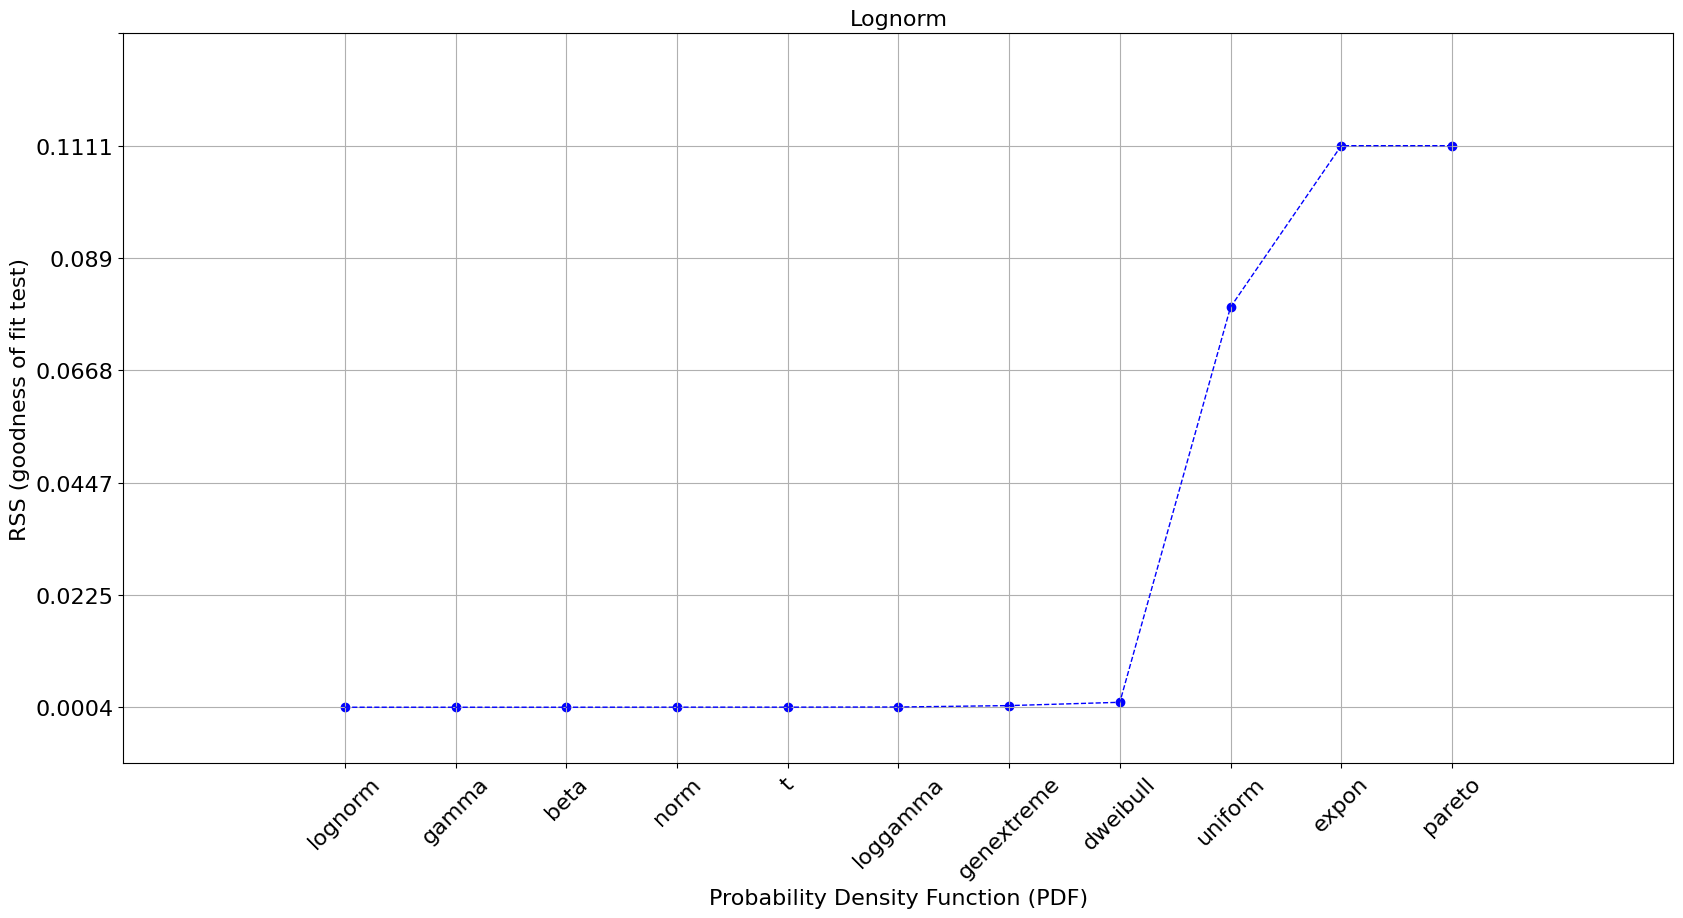

In [7]:
# Plot the RSS of the fitted distributions.
dfit.plot_summary()

But why did the normal distribution not have the lowest Residual Sum of Squares despite we generated random normal data?

Well, first of all, our input data set will always be a finite list that is bound within a (narrow) range. In contradition, the theoretical (normal) distribution goes to infinity in both directions. Secondly, all statistical analyses are based on models, and all models are merely simplifications of the real world. Or in other words, to approximate the theoretical distributions, we need to use multiple statistical tests, each with its own (dis)advantages. Finally, some distributions have a very flexible character for which the (log)gamma is a clear example. For a large k, the gamma distribution converges to normal distribution [4].

The result is that the top 7 distributions have a similar and low RSS score, among them the normal distribution. We can see in the summary statistics that the estimated parameters for the normal distribution are loc=1.99 and scale=3.99, which is very close to our initially generated random sample population (mean=2, std=4). All things considered, A very good result.

A beta(a, b) distribution is approximately normal if the parameters a and b are large and approximately equal.

### Bootstrapping for more confidence.

We can further validate our fitted model using a bootstrapping approach and the Kolmogorov-Smirnov (KS) test to assess the goodness of fit [9]. If the model is overfitting, the KS test will reveal a significant difference between the bootstrapped samples and the original data, indicating that the model is not representative of the underlying distribution. In distfit, the n_bootst parameter can be set during initialization or afterward (see code section).

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
It can be used to estimate summary statistics such as the mean or standard deviation. It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data.

K-S or Kolmogorov-Smirnov chart measures performance of classification models. More accurately, K-S is a measure of the degree of separation between the positive and negative distributions. The K-S is 100, if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives.

On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0. In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.


[distfit] >INFO> Bootstrap for 11 distributions with n_boots=100
[distfit] >INFO> Bootstrap: [lognorm   ] > Score: 0.8 > Pass 95% CII KS-test: True 
[distfit] >INFO> Bootstrap: [gamma     ] > Score: 0.74 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [beta      ] > Score: 0.35 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [norm      ] > Score: 0.59 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [t         ] > Score: 0.49 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [loggamma  ] > Score: 0.31 > Pass 95% CII KS-test: True 
[distfit] >INFO> Bootstrap: [genextreme] > Score: 0.01 > Pass 95% CII KS-test: False  
[distfit] >INFO> Bootstrap: [dweibull  ] > Score: 0 > Pass 95% CII KS-test: False  
[distfit] >INFO> Bootstrap: [uniform   ] > Score: 0 > Pass 95% CII KS-test: False  
[distfit] >INFO> Bootstrap: [expon     ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [pareto    ] > Score: 0 > Pass 95% CII KS-test: False 
[distfit] 

          name     score  bootstrap_score bootstrap_pass
0      lognorm  0.000368             0.80           True
1        gamma  0.000368             0.74           True
2         norm  0.000383             0.59           True
3            t  0.000383             0.49           True
4         beta   0.00037             0.35           True
5     loggamma  0.000411             0.31           True
6   genextreme  0.000691             0.01          False
7     dweibull  0.001341             0.00          False
8      uniform  0.079306             0.00          False
9        expon  0.111143             0.00          False
10      pareto  0.111143             0.00          False


(<Figure size 2000x1000 with 2 Axes>,
 <AxesSubplot: title={'center': 'Lognorm'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

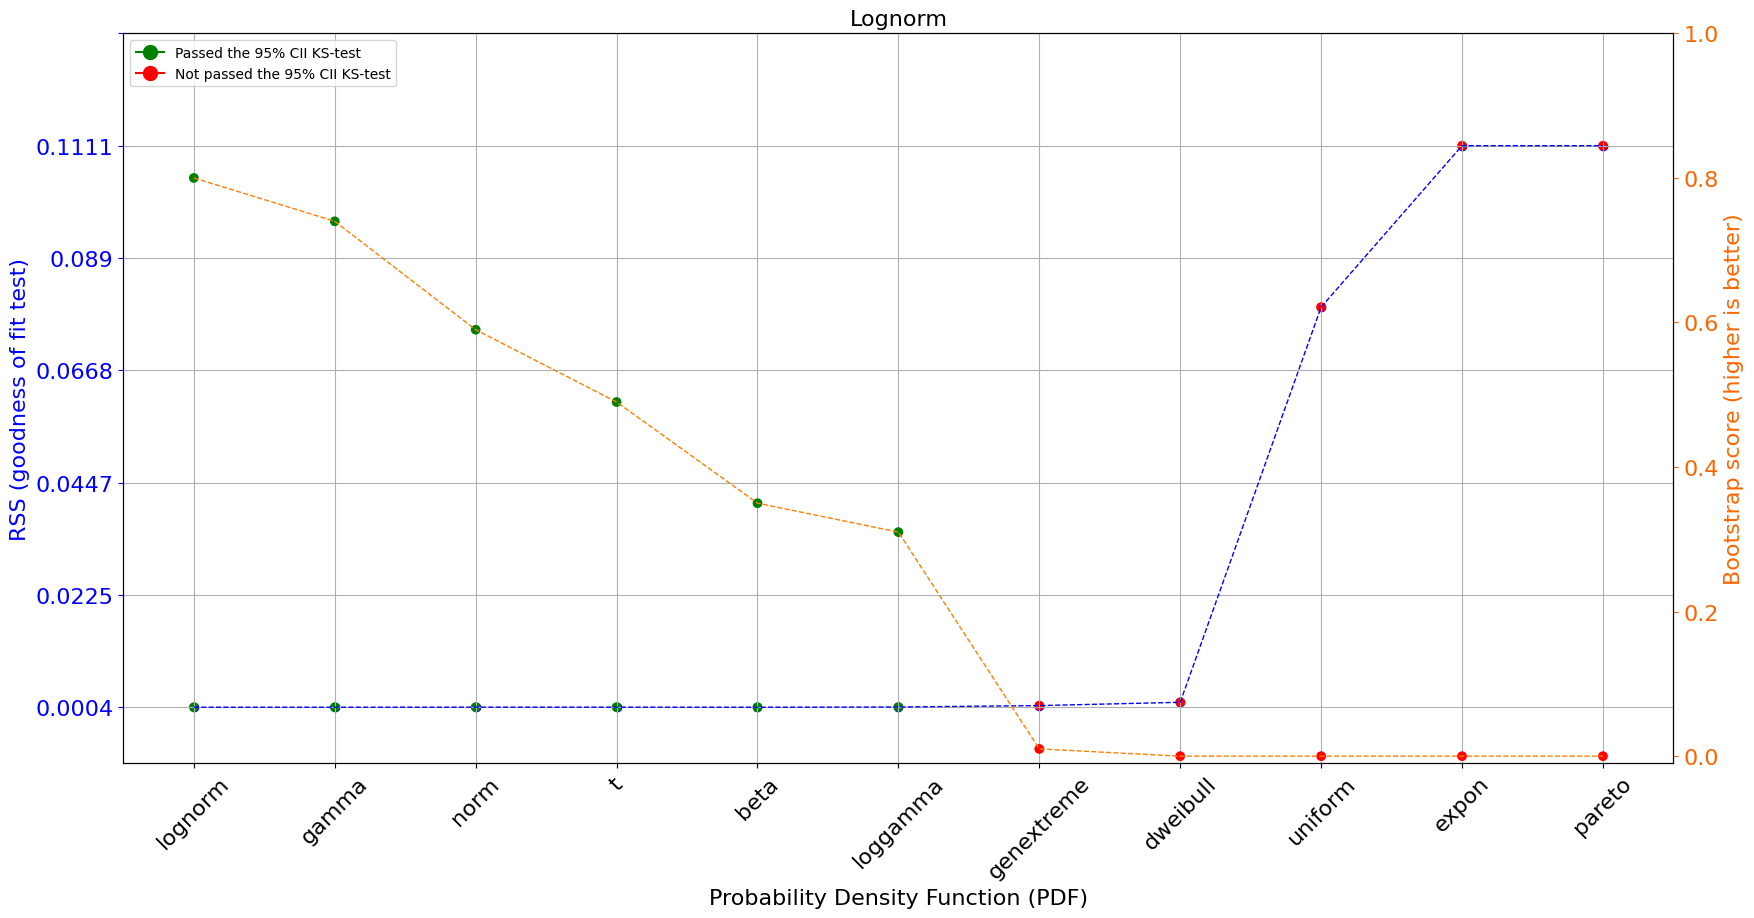

In [8]:
# Set bootstrapping during initialization.
# dfit = distfit(method='parametric', n_boots=100)

# Bootstrapping
dfit.bootstrap(X,n_boots=100)

# Print
print(dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']])

#           name     score  bootstrap_score bootstrap_pass
# 0     loggamma  0.000218             0.42           True
# 1         beta  0.000217             0.36           True
# 2            t  0.000248             0.08           True
# 3         norm  0.000247             0.07           True
# 4      lognorm  0.000311             0.04          False
# 5        gamma   0.00029             0.01          False
# 6   genextreme  0.000874             0.00          False
# 7     dweibull  0.001651             0.00          False
# 8      uniform  0.073118             0.00          False
# 9        expon  0.104076             0.00          False
# 10      pareto  0.104076             0.00          False

# Plot the RSS and bootstrap scores of the fitted distributions.
dfit.plot_summary()

The plot contains on the left axes the goodness of fit test and on the right axes (orange line) the bootstrap result. The bootstrap score is a value between [0, 1] and depicts the fit-success ratio for the number of bootstraps and the PDF. In addition, the green and red dots depict whether there was a significant difference between the bootstrapped samples and the original data. The bootstrap test now excludes a few more PDFs that showed no stable results.

It is good to realize now that the statistical tests only help you to look in the right direction, and that choosing the best model is not only a statistical question; it is also a modeling decision [5]. Think about this: the loggamma distributions are heavily right-tailed, while the normal distribution is symmetrical (both tails are similar). This can make a huge difference when using confidence intervals and predicting outliers in the tails. Choose your distribution wisely so that it matches the application.

### Plots guide towards a better decision.

A best practice is to use both statistics and a visual curation to decide what the best distribution fit is. Using the PDF/CDF and QQ plots can be some of the best tools to guide those decisions. As an example, Figure 2 illustrates the goodness-of-fit test statistics for which the first 7 PDFs have a very similar and low RSS score. The dweibull distribution is ranked number 8 (HERE 7), with also a low RSS score. However, a visual inspection will learn us that, despite having a relatively low RSS score, it is not a good fit after all.

In [9]:
import matplotlib.pyplot as plt

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-230.904480, scale:232.881471)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-230.904480, scale:232.881471)


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '\nlognorm(s=0.0170933, loc=-230.904, scale=232.881)'}, xlabel='Values', ylabel='Frequency'>)

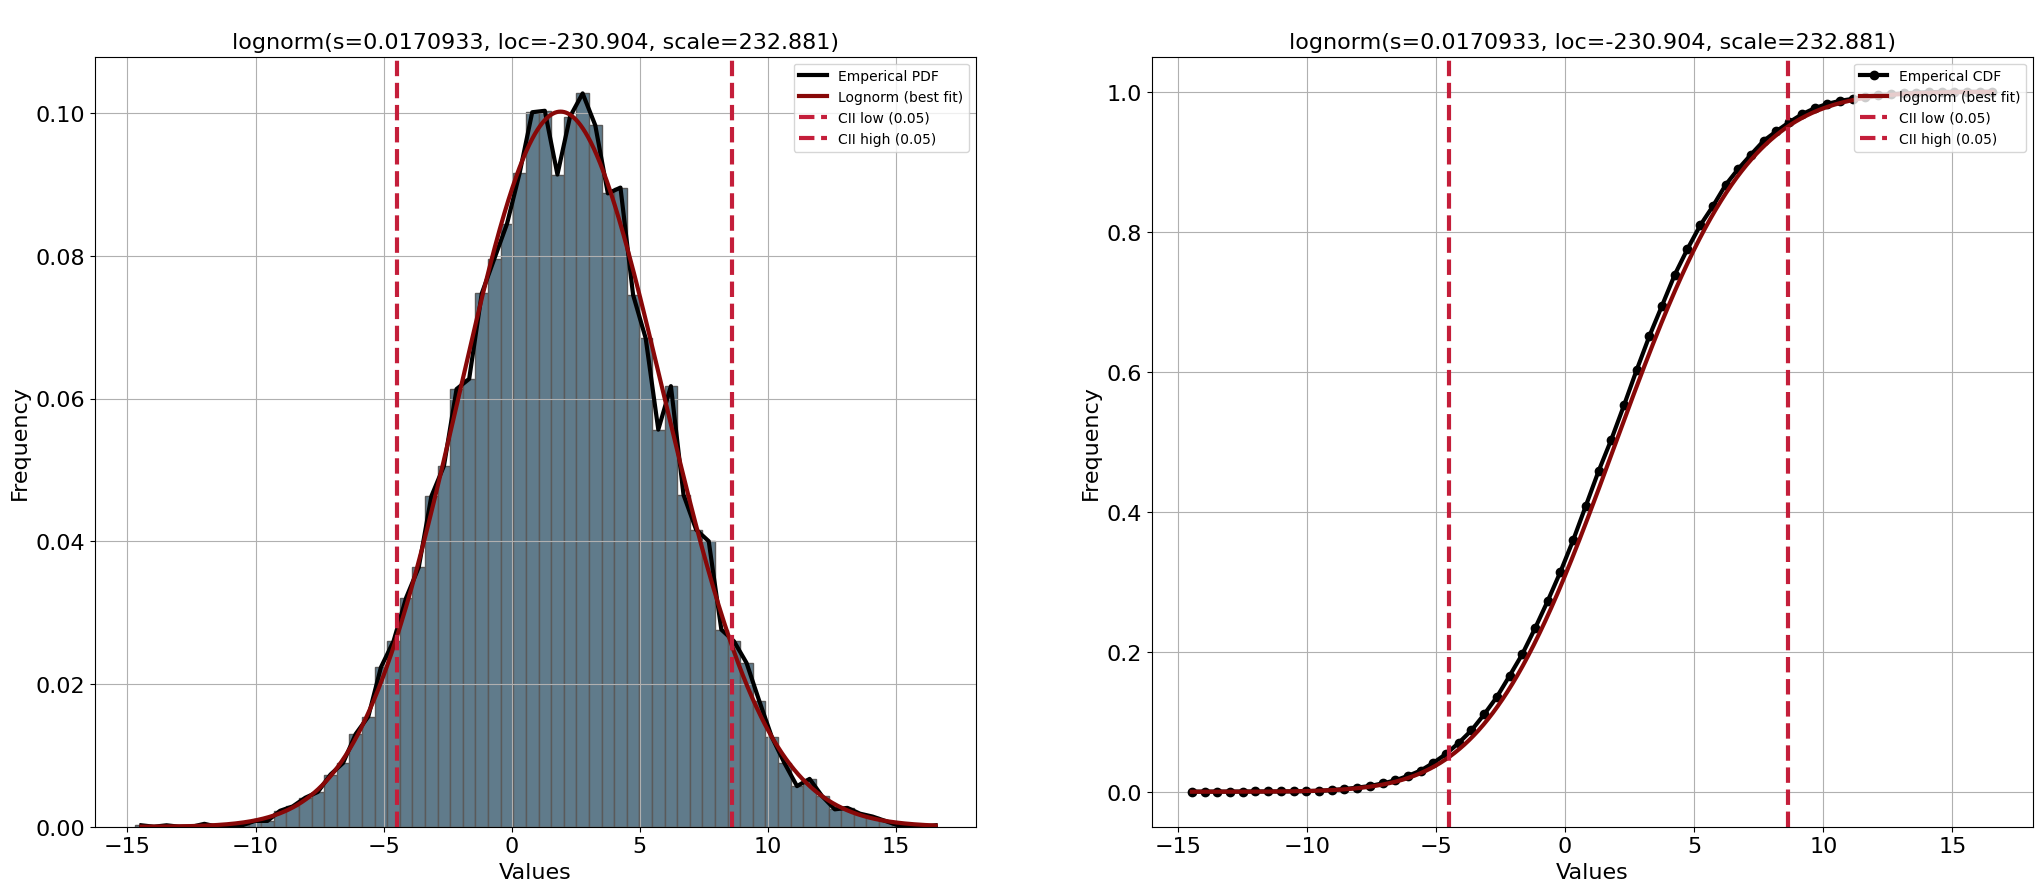

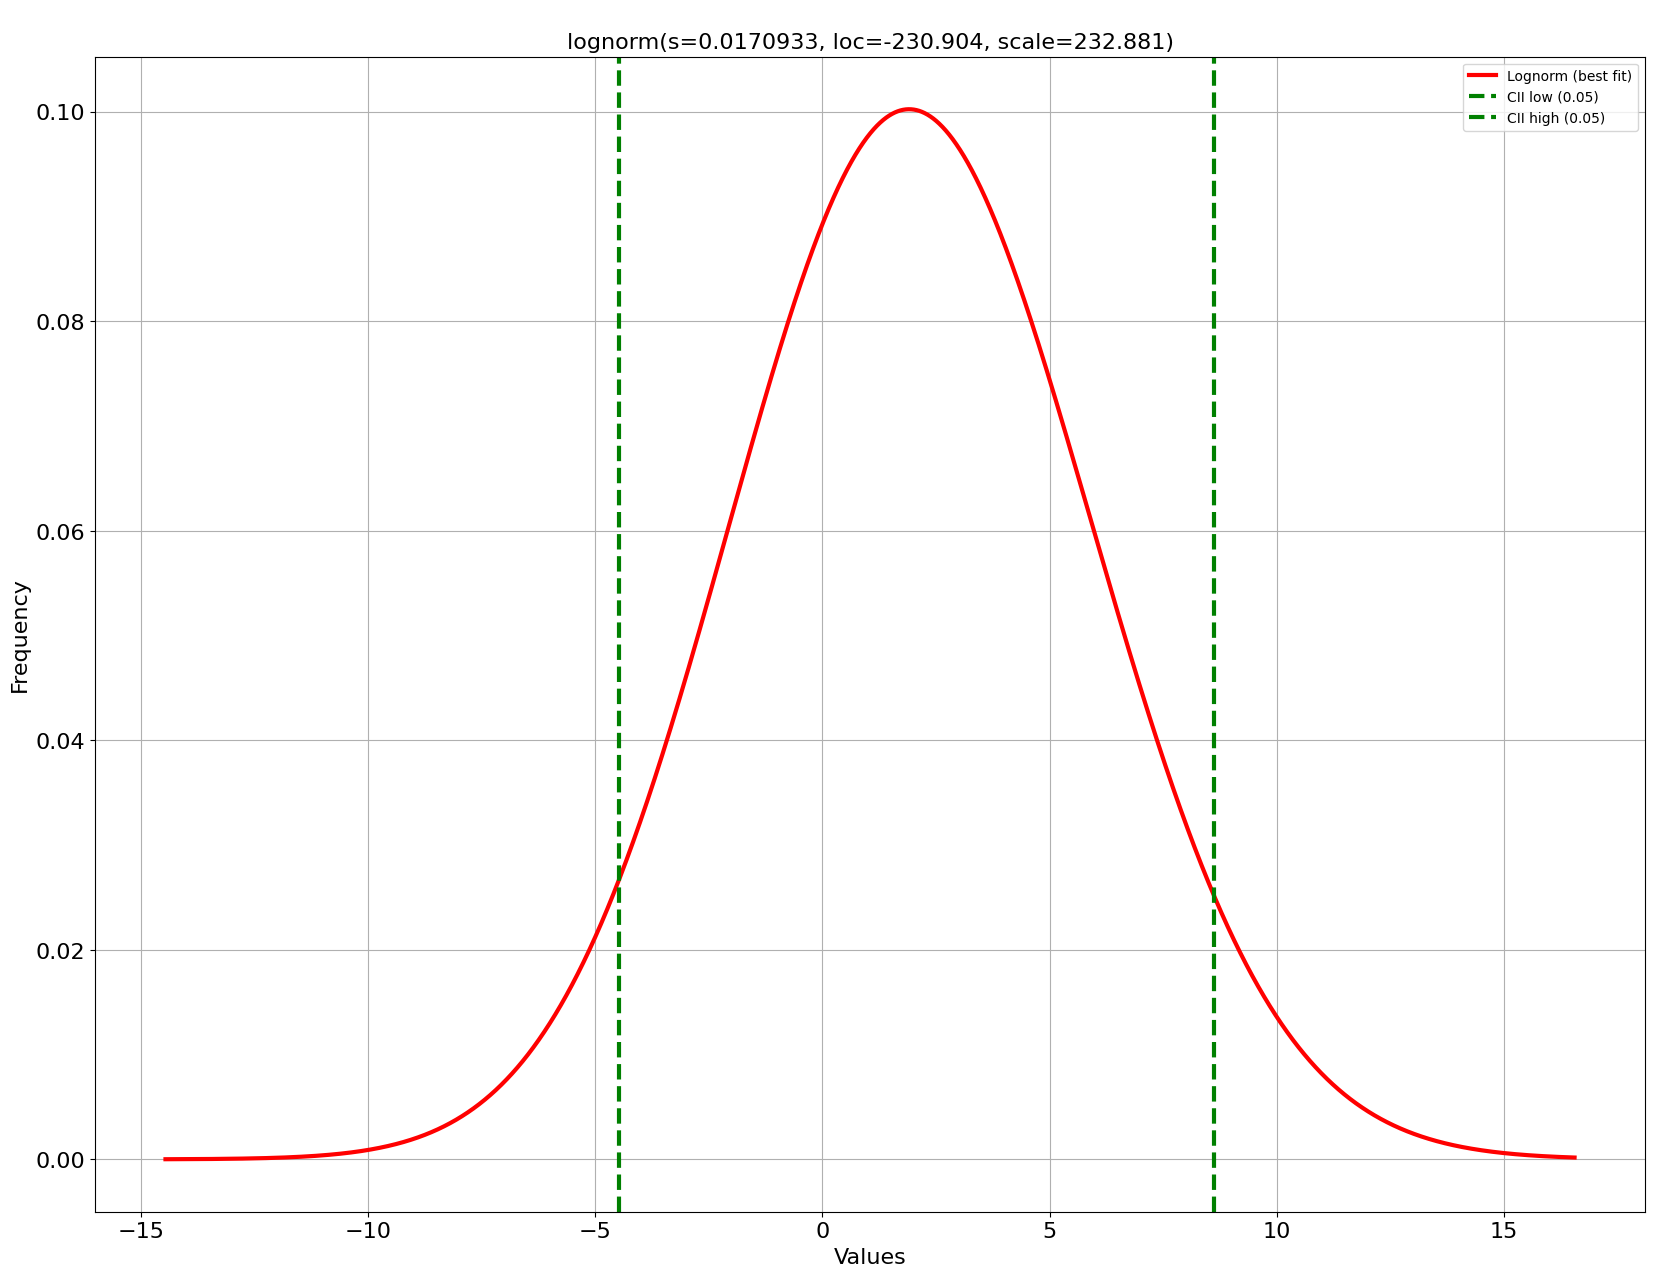

In [10]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', ax=ax[1])

# Change or remove properties of the chart.
dfit.plot(chart='PDF', 
          emp_properties=None,
          bar_properties=None,
          pdf_properties={'color': 'r'},
          cii_properties={'color': 'g'})

### Quantile-Quantile plot.

There is one more plot that we can inspect, which is the QQ plot. The QQ plot compares the empirical probability distributions vs. the theoretical probability distributions by plotting their quantiles against each other. If the two distributions are equal then the points on the QQ-plot will perfectly lie on a straight line y = x. We can make the QQ-plot using the qqplot function (Figure 5). The left panel shows the best fit, and the right panel includes all fitted theoretical distributions. More details on how to interpret the QQ plot can be found in this blog [3].

(None,
 <AxesSubplot: title={'center': 'QQ-plot\nlognorm(s=0.0170933, loc=-230.904, scale=232.881)'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>)

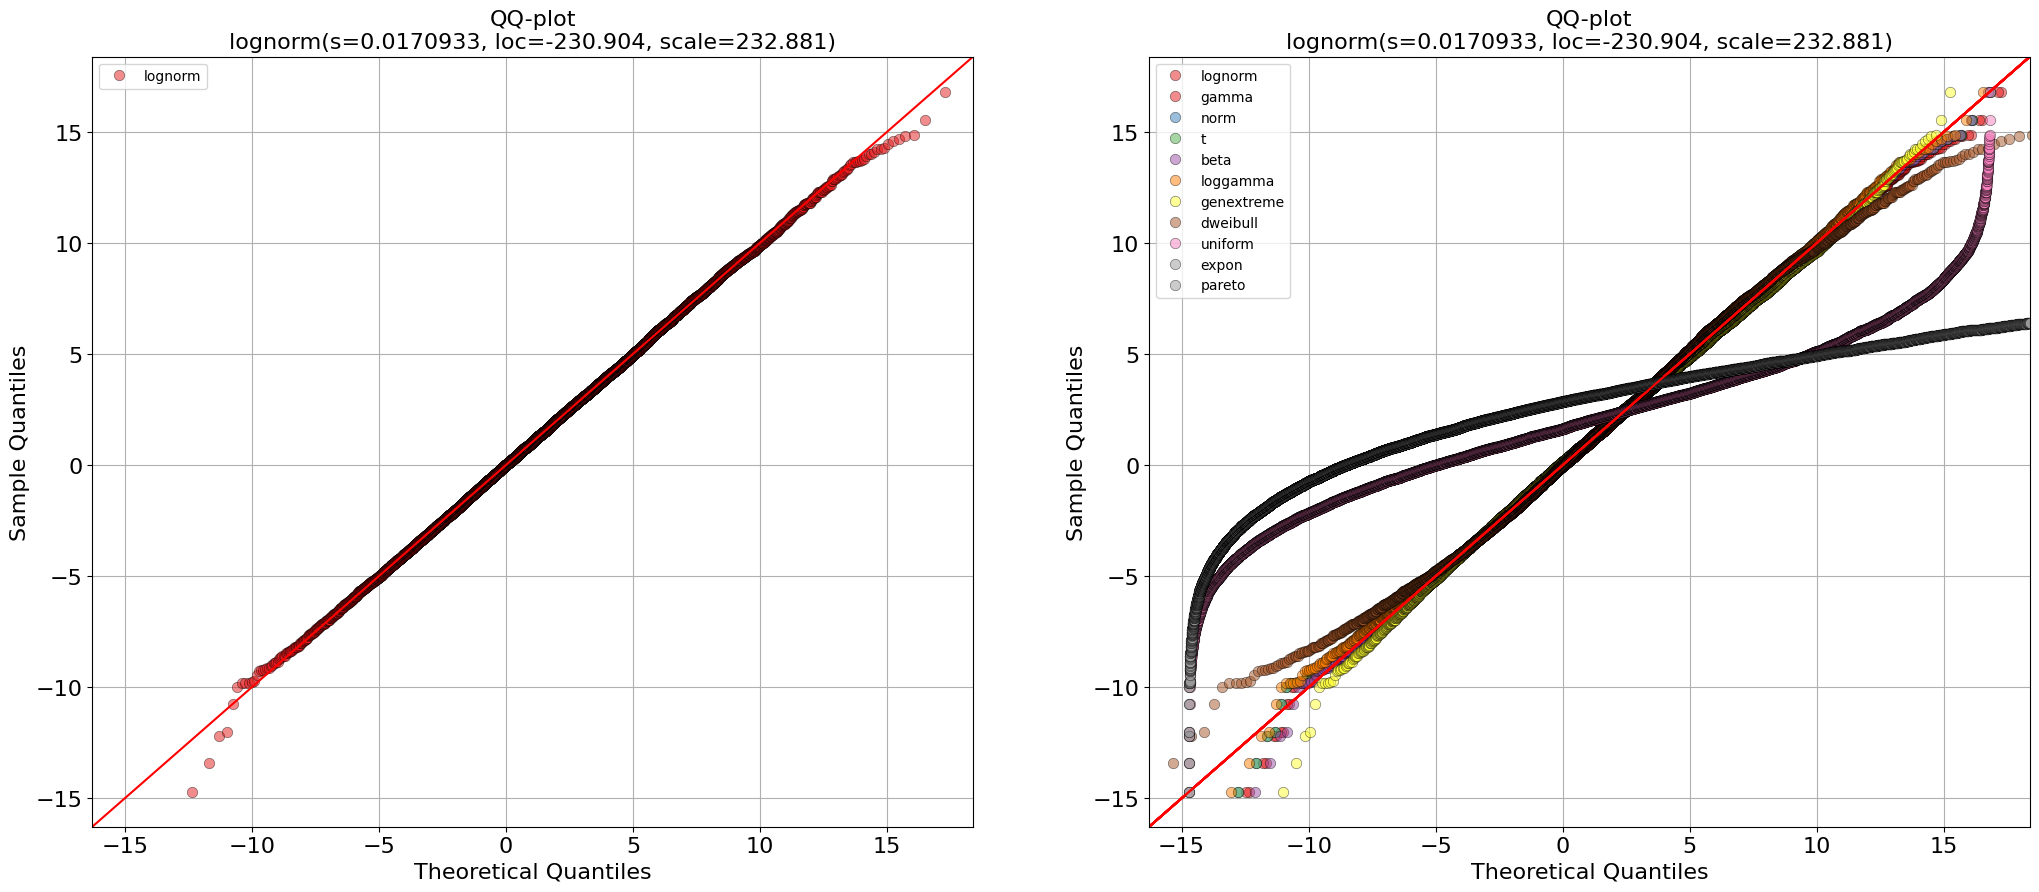

In [11]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot left panel with best fitting distribution.
dfit.qqplot(X, ax=ax[0])
# plot right panel with all fitted theoretical distributions
dfit.qqplot(X, n_top=11, ax=ax[1])

### Identify the best distribution fit using non-parametric fitting.

Non-parametric Density Estimation is when the population sample is “distribution-free" meaning that data do not resemble a common theoretical distribution. In distfit, two non-parametric methods are implemented for non-parametric density fitting: the quantile and percentile methods. Both methods assume that the data does not follow a specific probability distribution. In the case of the quantile method, the quantiles of the data are modeled which can be useful for data with skewed distributions. In the case of the percentile method, the percentiles are modeled which can be useful when data contains multiple peaks. In both methods, the advantage is that it is robust to outliers and does not make assumptions about the underlying distribution. In the code section below we initialize using the method method='quantile' or method='percentile'. All functionalities, such as predicting, and plotting can be used in the same manner as shown in the previous code sections.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Compute confidence intervals [percentile]
[distfit] >INFO> Create PDF plot for the percentile method.


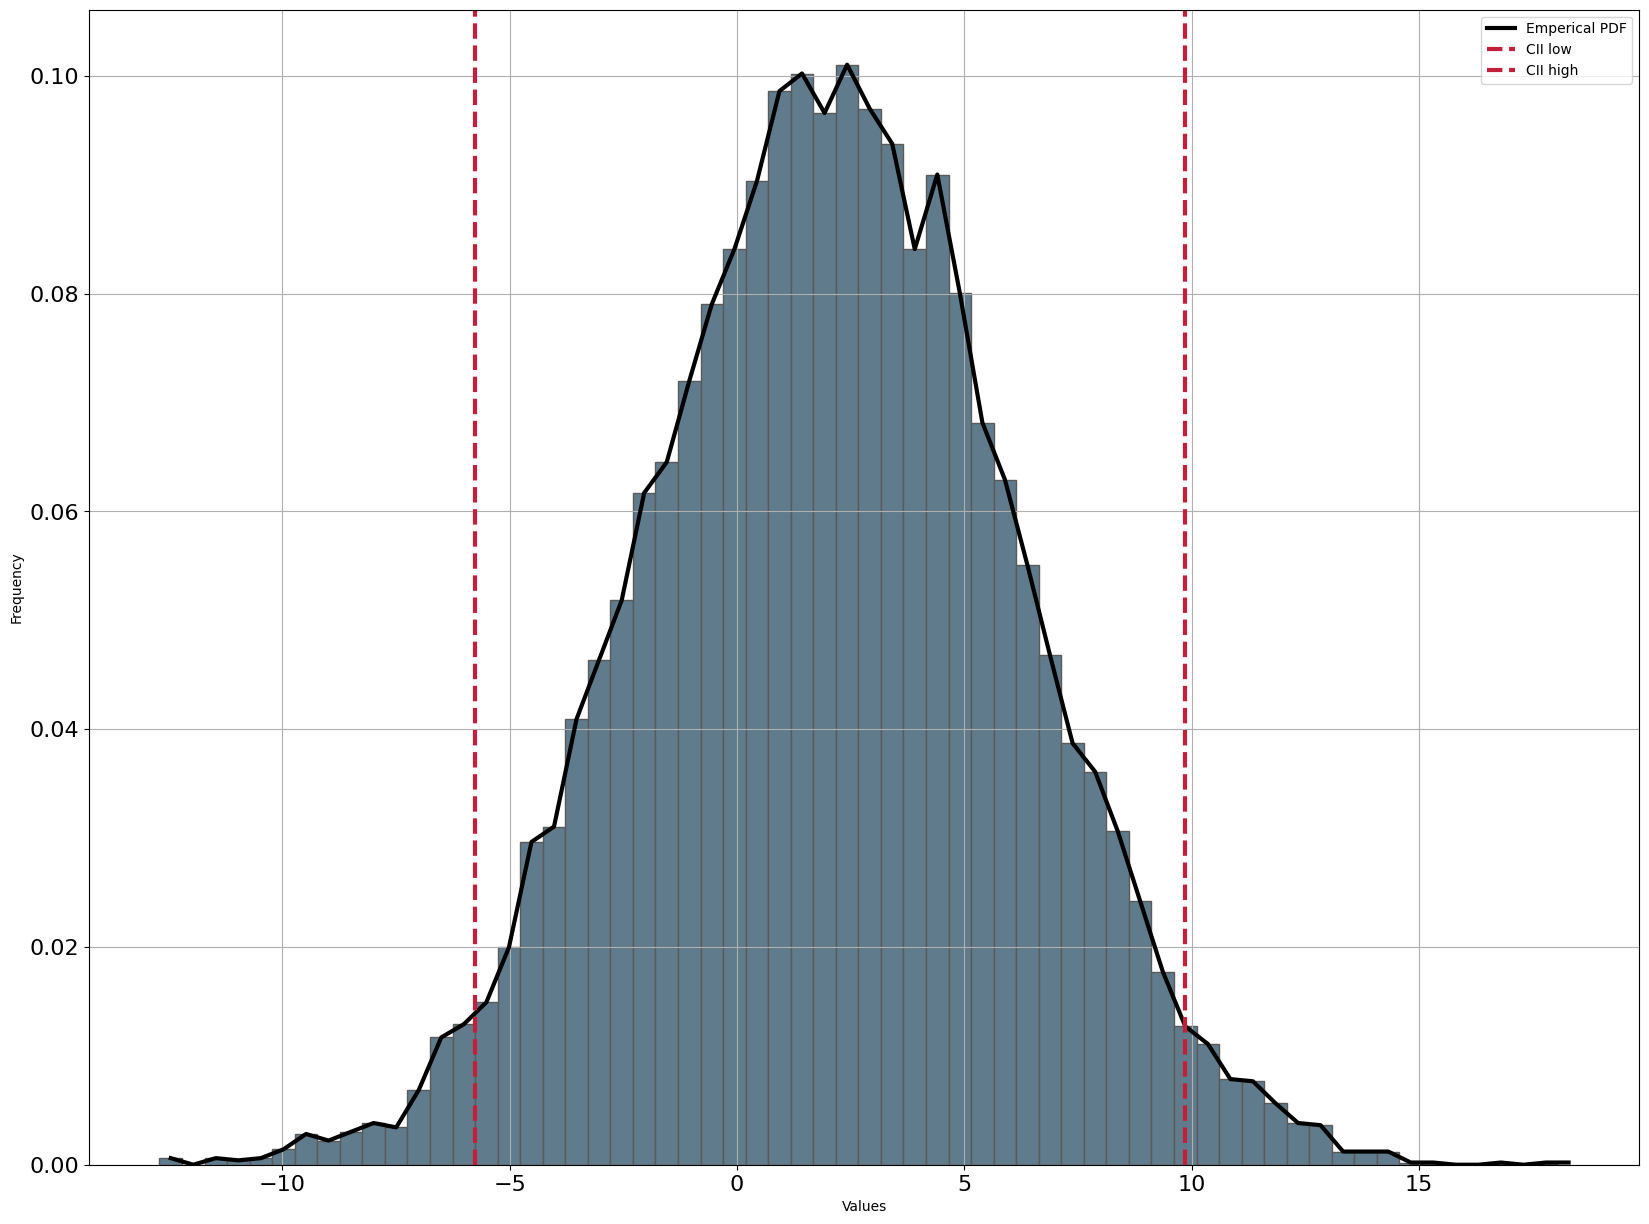

In [12]:
# Load library
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the quantile or percentile approach.
dfit = distfit(method='quantile')
dfit= distfit(method='percentile')

# Fit model on input data X and detect the best theoretical distribution.
dfit.fit_transform(X)
# Plot the results
fig, ax = dfit.plot()

### Identify the best distribution for discrete data.

In case the random variables are discrete, the distift library contains the option for discrete fitting. The best fit is derived using the binomial distribution. The questions can be summarized as follows: given a list of nonnegative integers, can we fit a probability distribution for a discrete distribution, and compare the quality of the fit? For discrete quantities, the correct term is Probability Mass Function (PMF). As far as discrete distributions go, the PMF for one list of integers is of the form P(k) and can only be fitted to the binomial distribution, with suitable values for n and p, and this method is implemented in distfit. See the code section below where a discrete dataset is created with n=8 and p=0.5. The random variables are given as input to distfit which detected the parameters n=8 and p=0.501366, indicating a very good fit.

In [13]:
# Load library
from scipy.stats import binom
from distfit import distfit

# Parameters for the test-case:
n = 8
p = 0.5
# Generate 10000 randon discrete data points of the distribution of (n, p)
X = binom(n, p).rvs(10000)
# Initialize using the discrete approach.
dfit = distfit(method='discrete')
# Find the best fit.
dfit.fit_transform(X)

# print results
print(dfit.model)
# 'name': 'binom',
# 'score': 0.00010939074999009602,
# 'chi2r': 1.5627249998585145e-05,
# 'n': 8,
# 'p': 0.501366,
# 'CII_min_alpha': 2.0,
# 'CII_max_alpha': 6.0}
# 'distr': <scipy.stats._discrete_distns.binom_gen at 0x14350be2230>,
# 'model': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x14397a2b640>,

# Make predictions
results = dfit.predict([0, 2, 8])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=7.47e-05] [n=8] [p=0.499217] [chi^2=1.07e-05]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Compute significance for 3 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


{'name': 'binom', 'model': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022CA172FCA0>, 'params': (8, 0.4992171219955219), 'score': 7.474437766989774e-05, 'chi2r': 1.067776823855682e-05, 'n': 8, 'p': 0.4992171219955219, 'CII_min_alpha': 2.0, 'CII_max_alpha': 6.0}


[distfit] >INFO> Create PDF plot for the discrete method.
[distfit] >INFO> Create PDF plot for the discrete method.


(<Figure size 2000x1500 with 2 Axes>,
 array([<AxesSubplot: title={'center': '\nBinom\nn=8, p=0.499217'}, xlabel='Values', ylabel='Frequency'>,
        <AxesSubplot: xlabel='n', ylabel='RSS'>], dtype=object))

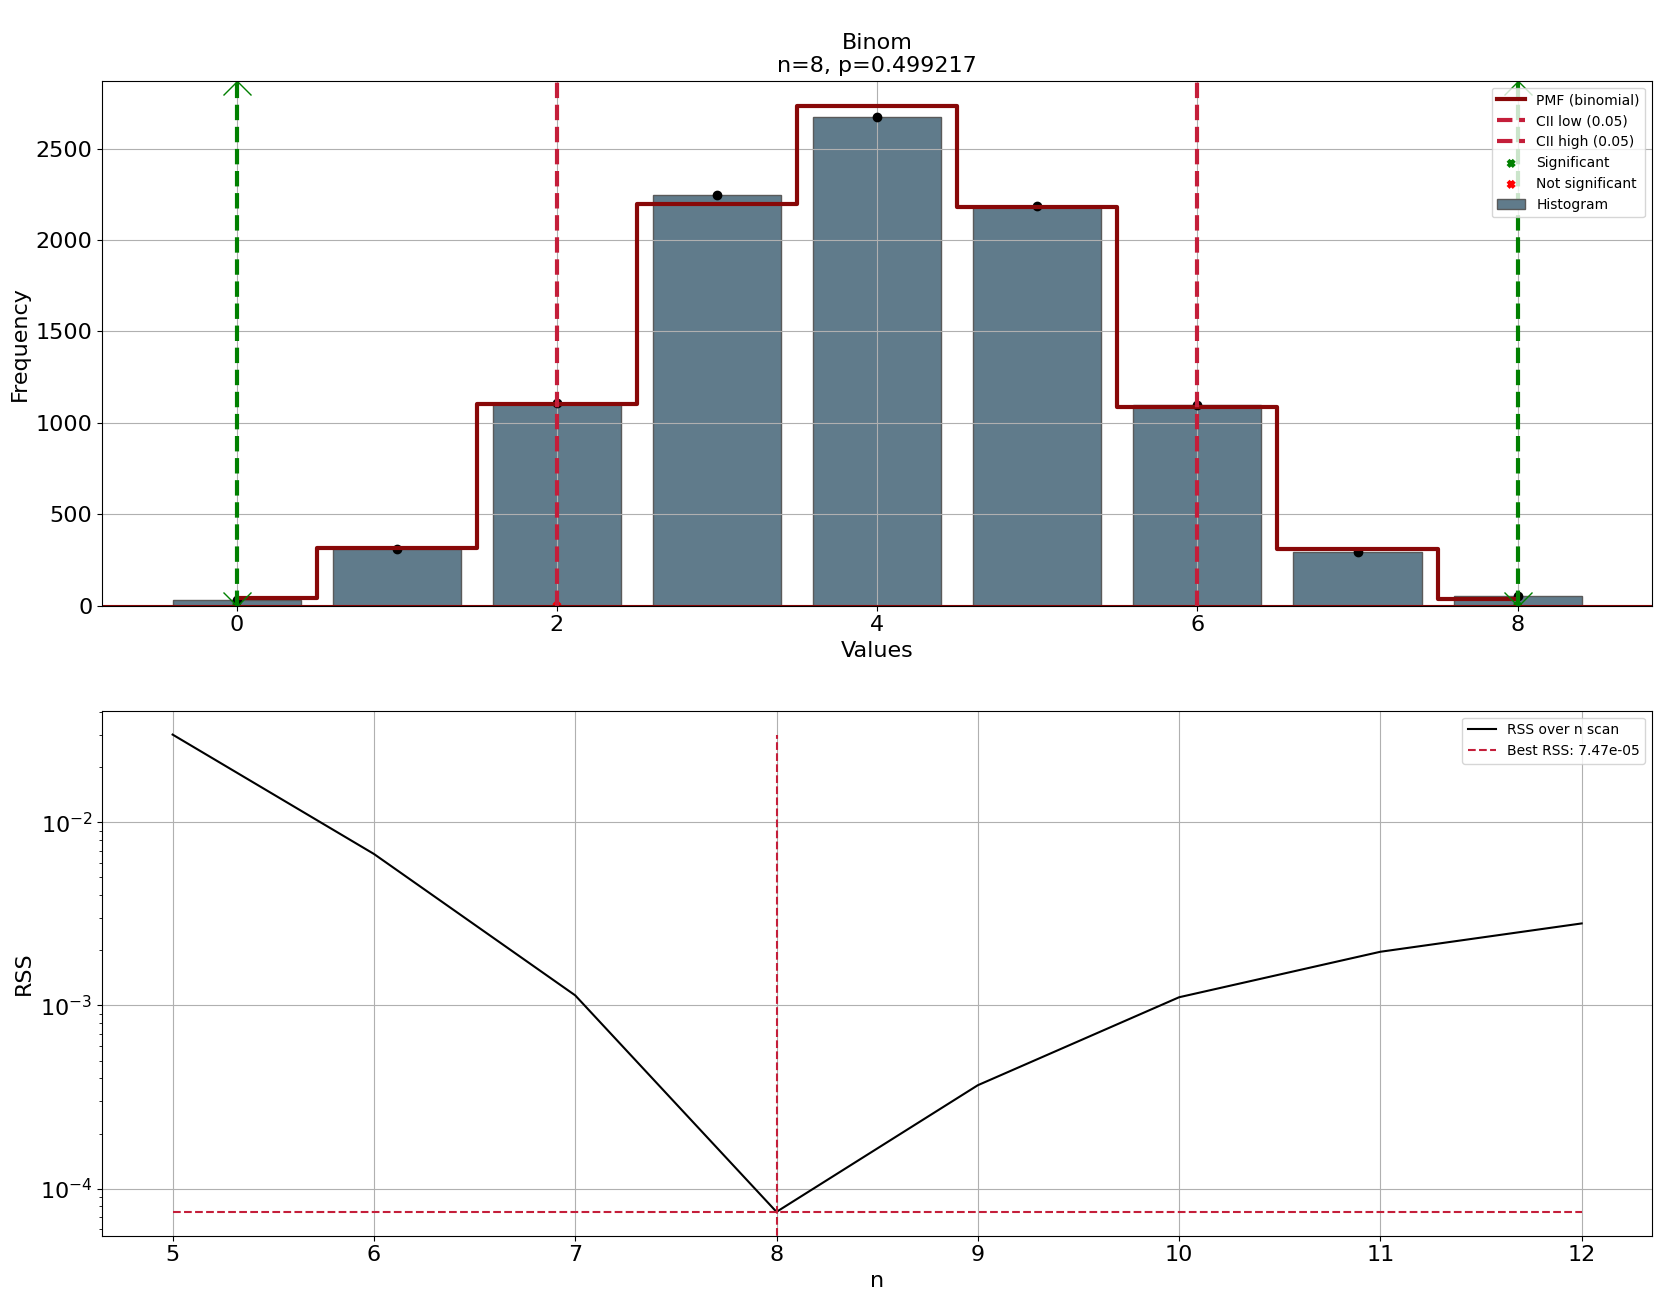

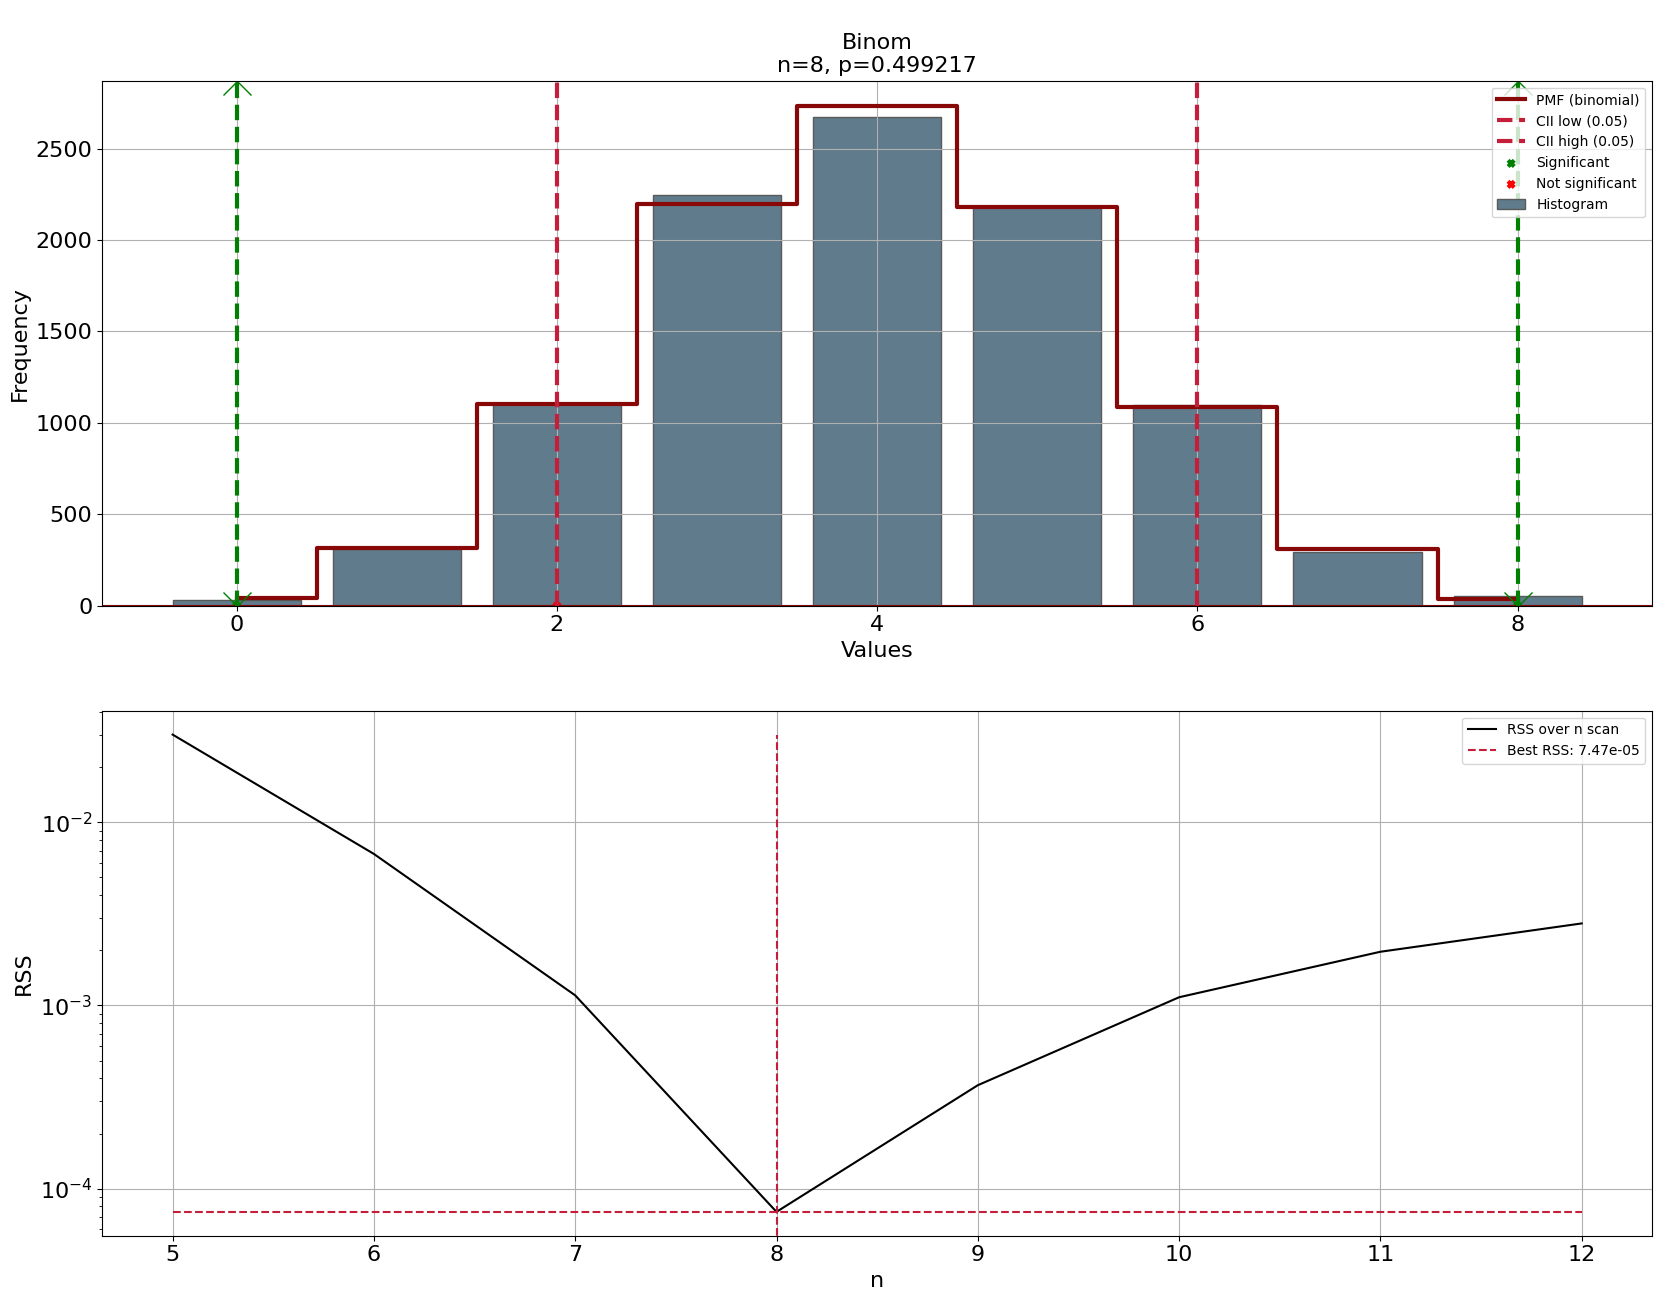

In [15]:
# Plot the results
dfit.plot()
# Change colors or remove parts of the figure.
# Remove emperical distribution
dfit.plot(emp_properties=None)
# Remove PDF
#dfit.plot(pdf_properties=None)
# Remove histograms
#dfit.plot(bar_properties=None)
#Remove confidence intervals
#dfit.plot(cii_properties=None)

The top figure shows the input data (black dots), and the fitted distribution (blue line). The detected parameters (n=8 and p=0.501366) are very well fitted, given that the generated random variables (n=8, p=0.5). The red vertical bars are the confidence intervals that are set to 0.05 (default). The bottom figure shows the RSS score over n scans. The best fit is detected with the lowest RSS. (image by the author)

### Applications of distribution fitting.

Anomaly/novelty detection is a clear application of density estimation. This can be achieved by calculating the confidence intervals given the distribution and parameters. Anomaly detection is applicable in a wide range of engineering situations where a clear, early warning of an abnormal condition is required. An anomaly or novelty is an observation that likely lies in a low-density region. The distfit library computes the confidence intervals, together with the probability of a sample being an outlier/novelty given the fitted distribution. Be aware that significance is corrected for multiple testing. Outliers can thus be located outside the confidence interval but not marked as significant.

[distfit] >WARNING> multtest will be removed from initialization in a future release. Please set this parameter when using the predict function. Example: dfit.predict(multtest="holm")
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000452183] [loc=1.928 scale=4.013]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.102025] [loc=-11.967 scale=13.895]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.102025] [loc=-2147483659.967 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.10 sec] [RSS: 0.00201882] [loc=2.036 scale=3.411]
[distfit] >INFO> [t         ] [0.66 sec] [RSS: 0.000452189] [loc=1.928 scale=4.013]
[distfit] >INFO> [genextreme] [0.27 sec] [RSS: 0.00123242] [loc=0.361 scale=3.965]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 0.000450899] [loc=-1804.535 scale=0.009]
[distfit] >INFO> [lognorm   ] [0.25 sec] [RSS: 0.000460899] [loc=-198.209 scale=200.096]
[distfit] >INFO> [beta      ] [0.18 sec] [RSS: 0.000459995] [loc=-47.604 

      y   y_proba y_pred         P
0  -8.0  0.019826   down  0.006609
1  -2.0  0.327685   none  0.163842
2   1.0  0.408850   none  0.408850
3   3.0  0.408850   none  0.394391
4   5.0  0.332792   none  0.221861
5  15.0  0.003455     up  0.000576


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '\ngamma(a=202661, loc=-1804.54, scale=0.0089137)'}, xlabel='Values', ylabel='Frequency'>)

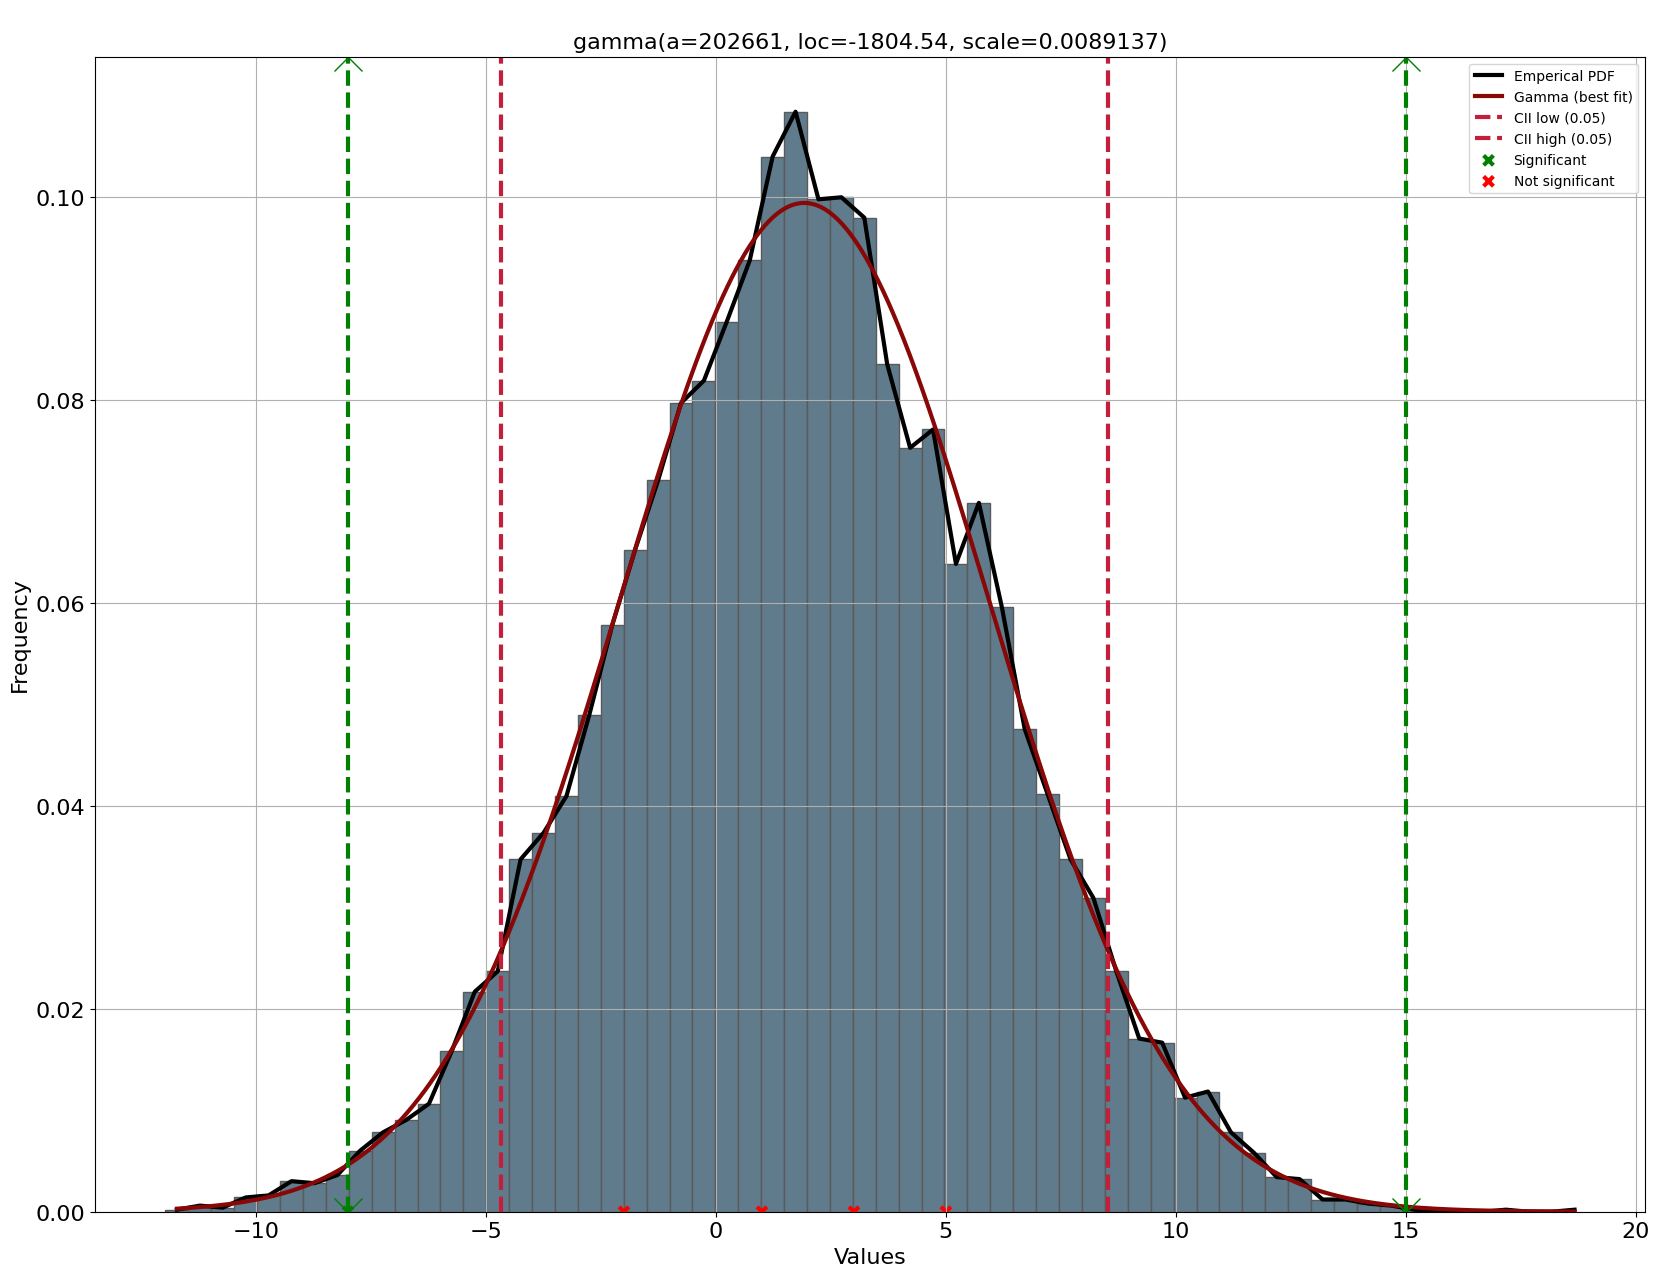

In [35]:
# Import libraries
import numpy as np
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the parametric approach (default).
dfit = distfit(multtest='fdr_bh', alpha=0.05)

# Fit model on input data X.
dfit.fit_transform(X)
# With the fitted model we can make predictions on new unseen data.
y = [-8, -2, 1, 3, 5, 15]
dfit.predict(y, todf=True)

# Print results
print(dfit.results['df'])
#      y   y_proba y_pred         P
# 0  -8.0  0.017455   down  0.005818
# 1  -2.0  0.312256   none  0.156128
# 2   1.0  0.402486   none  0.399081
# 3   3.0  0.402486   none  0.402486
# 4   5.0  0.340335   none  0.226890
# 5  15.0  0.003417     up  0.000569

# Plot the results
dfit.plot()

In [36]:
# Import libraries
import numpy as np
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the parametric approach (default).
dfit = distfit()

# Fit model on input data X.
dfit.fit_transform(X)

# The fitted distribution can now be used to generate new samples.
X_synthetic = dfit.generate(n=1000)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000491436] [loc=2.007 scale=4.015]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.104578] [loc=-12.487 scale=14.494]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.104578] [loc=-2147483660.487 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.00175147] [loc=1.950 scale=3.440]
[distfit] >INFO> [t         ] [0.66 sec] [RSS: 0.000491442] [loc=2.007 scale=4.015]
[distfit] >INFO> [genextreme] [0.41 sec] [RSS: 0.00137633] [loc=0.460 scale=3.977]
[distfit] >INFO> [gamma     ] [0.09 sec] [RSS: 0.000495133] [loc=-1609.044 scale=0.010]
[distfit] >INFO> [lognorm   ] [0.25 sec] [RSS: 0.000535752] [loc=-285.809 scale=287.784]
[distfit] >INFO> [beta      ] [0.12 sec] [RSS: 0.000496362] [loc=-96.296 scale=203.395]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0766101] [loc=-12.487 scale=30.678]
[distfit] >INFO> [loggamma  ] [0.09 sec] [RSS: 0.000475472] [loc=-719.309 scale=109.

Synthetic data generations: Probability distribution fitting can be used to generate synthetic data that is similar to real-world data. By fitting a probability distribution to real-world data, it is possible to generate synthetic data that can be used to test hypotheses and evaluate the performance of algorithms. In the code section below we will first generate random variables from a normal distribution, estimate the distribution parameters, and we can then start creating synthetic data using the fitted distribution.

Optimization and compression: Probability distribution fitting can be used to optimize various parameters of a probability distribution, such as the mean and variance, to best fit the data. Finding the best parameters can help to better understand the data. In addition, if hundreds of thousands of observations can be described with only the loc, scale, and arg parameters, it is a very strong compression of the data.

An informal investigation of the properties of the input dataset is a very natural use of density estimates. Density estimates can give valuable indications of skewness and multimodality in the data. In some cases, they will yield conclusions that may then be regarded as self-evidently true, while in others, they will point the way to further analysis and data collection.

Testing hypotheses: Probability distribution fitting can be used to test hypotheses about the underlying probability distribution of a data set. For example, one can use a goodness-of-fit test to compare the data to a normal distribution or a chi-squared test to compare the data to a Poisson distribution.

Modeling: Probability distribution fitting can be used to model complex systems such as weather patterns, stock market trends, biology, population dynamics, and predictive maintenance. By fitting a probability distribution to historical data, it is possible to extract valuable insights and create a model that can be used to make predictions about future behavior.

NOTE: Prepared based on knowlegde gained from the article "How to Find the Best Theoretical Distribution for Your Data" by E.Taskesen.  

### 